<a href="https://colab.research.google.com/github/koushikpr/Machine-Learning-Prerequisites/blob/main/Machine_Learning_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

---



Step 1:Installing tensorflow onto any IDE


In [ ]:
pip install tensorflow


     |████████████████████████████████| 462 kB 4.7 MB/s 


Step 2:Switching to Version 2X

In [ ]:
%tensorflow_version 2.x

Step 3:Importing tensorflow 

In [ ]:
import tensorflow as tf

# **Running Basics of Tensors on Python**

---



1. Creating Variables

In [ ]:
string = tf.Variable('Koushik',tf.string)
integer = tf.Variable(1234,tf.int16)
floating = tf.Variable(12.34,tf.float64)
ranktensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)

2. Finding rank

In [ ]:
ranking = tf.rank(ranktensor)
print(ranking)

tf.Tensor(2, shape=(), dtype=int32)


3. Shaping of Tensors

In [ ]:
#creating a tensors of ones
oness = tf.ones([1,3,5])
check = tf.reshape(oness,[3,1,5])
sizing = tf.reshape(oness,[3,-1])
print(oness)
print(check)
print(sizing)

tf.Tensor(
[[[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]], shape=(1, 3, 5), dtype=float32)
tf.Tensor(
[[[1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]]], shape=(3, 1, 5), dtype=float32)
tf.Tensor(
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]], shape=(3, 5), dtype=float32)


4. Converting into 2D tensor

In [ ]:
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tens = tf.Variable(matrix, dtype=tf.int32) 
print(tens)
print(tf.rank(tens))
print(tens.shape)

<tf.Variable 'Variable:0' shape=(4, 5) dtype=int32, numpy=
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]], dtype=int32)>
tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


5. Slicing and its Techniques

a. Selecting nth element of mth row


In [ ]:
row = 2
element = 3
mn = tens[row,element]
print(mn)


tf.Tensor(14, shape=(), dtype=int32)


b. Selecting an entire row

In [ ]:
row = 1
rs = tens[row]
print(rs)

tf.Tensor([ 6  7  8  9 10], shape=(5,), dtype=int32)


c. Selecting entire column

In [ ]:
column = -1
cs = tens[:,column]
print(cs)

tf.Tensor([ 5 10 15 20], shape=(4,), dtype=int32)


d. Selecting multiple rows

In [ ]:
row1 = 0
row2 = 2
mr = tens[row1::row2]
print(mr)

tf.Tensor(
[[ 1  2  3  4  5]
 [11 12 13 14 15]], shape=(2, 5), dtype=int32)


e. Selecting column in multiple rows

In [ ]:
column = 0
row1 = 0
row2 =1
cmr = tens[column:row1,row2]
print(cmr)

tf.Tensor([], shape=(0,), dtype=int32)


### **TensorFLow Core Algorithms**

---



# **Core Learning Algorthims 1:Linear Regression**

---



1. Linear Regression:


*Predicting the output of data that are linearly related and can be generated by a line of best fit*



Ex: Program to create a line of best fit

(0.0, 6.0, 0.0, 20.0)

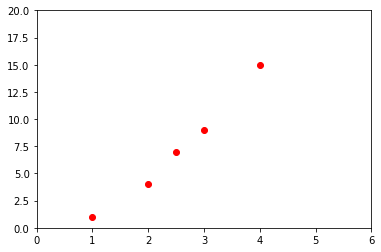

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

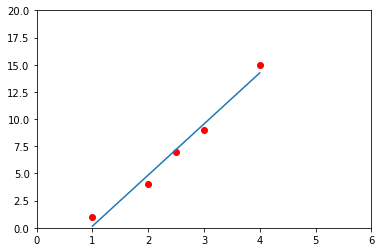

In [ ]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

**Predicting Who survived the titanic by Linear Regression**

Step 1. Installing sklearn

In [ ]:
!pip install -q sklearn

Step 2. Importing required libraries

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

Step 3. Reading csv files using panda

In [ ]:
reading = pd.read_csv('/content/train.csv')
evaluation = pd.read_csv('/content/eval.csv')
#removing the survived column which we will be predicting
reading_survivors=reading.pop('survived')
eval_survivors=evaluation.pop('survived')
reading.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


Step 4. Analysing the data

From the given Data we can infer that we will be working  Age,Sex,class  as the majority factor of survivability rate

In [ ]:
reading.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


Step 5: Analysing Age of Passengers

29.631307814992027


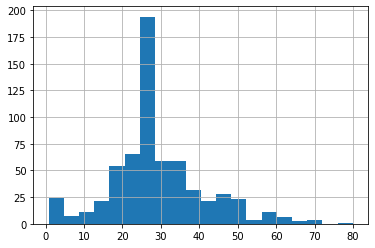

In [ ]:
reading.age.hist(bins=20)
print(reading.age.mean())

Inference 1: Avg age of the passengers is btw 20-30

Step 5: Analysing Sex count of Passengers

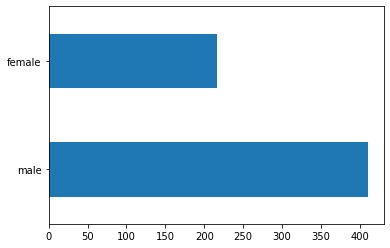

In [ ]:
count=reading.sex.value_counts()
count.plot(kind='barh')

Inference 2: There are twice as males as in females

Step 6: Analysing Class of Passengers

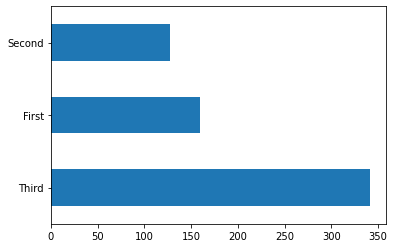

In [ ]:
reading['class'].value_counts().plot(kind='barh')

Inference 3: Majority of passengers are 3rd class

Step 7: Analysis our required prediction of survived

Text(0.5, 0, 'survived')

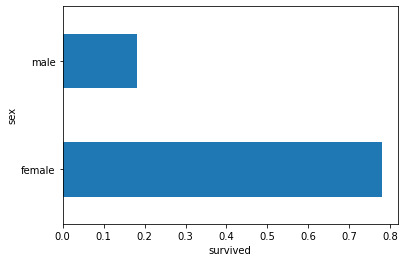

In [ ]:
pd.concat([reading,reading_survivors],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('survived')

Inference 4:Females have a Higher chance of surviving than males
(Due to ladies and children policy)


Step 8: Creating our Featured Column/Unique Column for data Analysis

In [ ]:
CC = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NC = ['age', 'fare']

fc =[]
for x in CC:
  voc = reading[x].unique()
  fc.append(tf.feature_column.categorical_column_with_vocabulary_list(x,voc))
for y in NC:
  fc.append(tf.feature_column.numeric_column(y, dtype=tf.float32))
print(fc)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

We Tend to load the Data in batches when we are dealing with large no of datasets. We tend to use epoch(a stream of one dataset). Since we are gonna load the same data agian and again we are gonna make our own input function

Step 9: Input Function

In [ ]:
from tensorflow._api.v2.compat.v1 import train
def makeinpfun(data,label,epochs = 10,shuffle=True,batchsize=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data),label))#creating a dataset fro given data
    if shuffle:
      ds = ds.shuffle(1000)#shuffles the data
    ds = ds.batch(batchsize).repeat(epochs)#converts data to batches and repeats 
    return ds
  return input_function

train_input = makeinpfun(reading,readingcheck)
eval_input = makeinpfun(evaluation,evalcheck)


Step 10: Creating the linear estimator(easy af!)

In [ ]:
lin_est = tf.estimator.LinearClassifier(feature_columns=fc)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp08mvc39n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Step 11: Training the model

In [ ]:
lin_est.train(train_input)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp08mvc39n/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 211.95
INFO:tensorflow:loss = 0.61399764, step = 100 (0.474 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...
INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmp08mvc39n/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 200...
INFO:tensorflow:Loss for final step: 0.45549494.


Step 12: Checking accuracy

In [ ]:
result = lin_est.evaluate(eval_input) # finds the statistical values of the dataset
clear_output()
print(result['accuracy'])

0.7689394


Step 13: Extracting the Data

In [ ]:
result = list(lin_est.predict(eval_input))
i = 2
clear_output()
print(evaluation.loc[i])
print(evalcheck.loc[i])
print(result[i]['probabilities'][1]*100)

sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
1
7.349919527769089


# **Core Learning Algorthims 2:Classification**

---



2. Classification: Unlike linear Regression that predicts the output based on the numerical values plots on an n dimensional graph, Classification is going to seperate all these values based on features or cahracterstics of the data. 

Predicting the Flower species 
This specific dataset seperates flowers into 3 different classes of species.
- Setosa
- Versicolor
- Virginica

The information about each flower is the following.
- sepal length
- sepal width
- petal length
- petal width

In [ ]:
Columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
Species = ['Setosa', 'Versicolor', 'Virginica']

Step 1: Loading the DataSet of Flowers

In [ ]:
#keras utilities allows us to read files and retrieve them from a cloud or our device
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")
#These are Prestored in the drive u can copy the above lines directly

#reading only the required column data
train = pd.read_csv(train_path, names=Columns, header=0)
test = pd.read_csv(test_path, names=Columns, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

Check the data

In [ ]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


Step 3: Remove the Species as we wanna predict that now

In [ ]:
trainspecies = train.pop('Species')
testspecies = test.pop('Species')
trainspecies.head()

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

Step 4: Converting our Data to Tensors Input 

In [ ]:
def inputf(features,labels,training =True,batchsize=256):
  ds = tf.data.Dataset.from_tensor_slices((dict(features),labels))
  if training:
    ds = ds.shuffle(1000).repeat()
  return ds.batch(batch_size=batchsize)
  

Step 5: Creating our feature columns

In [ ]:
fc = []
for key in train.keys():
  fc.append(tf.feature_column.numeric_column(key=key))
print(fc)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


Step 6: Loading the estimator DNN (Deep Neural Network Classifier)

In [ ]:
#DNN classifier with 2 hidden layers(30 and 10 nodes repsectively) and 3 classes
cf = tf.estimator.DNNClassifier(
    feature_columns=fc,
    hidden_units=[30,10],
    n_classes=3
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpyuk3z7mj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Step 7: Training the estimator

In [ ]:
cf.train(
    input_fn = lambda: inputf(train,trainspecies,training=True),
    steps=5000
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpyuk3z7mj/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.0287976, step = 0
INFO:tensorflow:global_step/sec: 191.305
INFO:tensorflow:loss = 0.75102574, step = 100 (0.530 sec)
INFO:tensorflow:global_step/sec: 262.971
INFO:tensorflow:loss = 0.6831207, step = 200 (0.376 sec)
INFO:tensorflow:global_step/sec: 204.911
INFO:tensorflow:loss = 0.6354548, step = 300 (0.491 sec)
INFO:tensorflow:global_step/sec: 219.619
INFO:tensorflow:loss = 0.60460556, step = 400 (0.453 sec)
INFO:tensorflow:global_step/sec: 174.735
INFO:tensorflow:loss = 0.5646676, step = 500 (0.576 sec)
INFO

Step 8: Evaluate the Model

In [ ]:
result = cf.evaluate(input_fn=lambda:inputf(test,testspecies,training=False))
clear_output()
print('Accuracy is',result['accuracy']*100)

Accuracy is 96.66666388511658


Step 9: Now Lets Run our predictions 

In [ ]:
predictions  = list(cf.predict(input_fn=lambda:inputf(test,testspecies,training=False)))
i = 6
#printing the detailsof the species
print(test.loc[i])
#extraction location of the species
id = predictions[i]['class_ids'][0]
#probability of only the required species and extracted location
probability = predictions[i]['probabilities'][id]
print('Species is ',Species[id],'Probability:',probability)
print('original species id',testspecies[i])
print('predicted id',id)
if testspecies[i]==id:
  print("Prediction successful")
else:
  print("Oops")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyuk3z7mj/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
SepalLength    5.5
SepalWidth     4.2
PetalLength    1.4
PetalWidth     0.2
Name: 6, dtype: float64
Species is  Setosa Probability: 0.97755706
original species id 0
predicted id 0
Prediction successful


Step 10: User Input Prediction of the Flower

In [ ]:
#reading user data
def userinput(datass,batchsize=256):
  return tf.data.Dataset.from_tensor_slices(dict(datass)).batch(batch_size=batchsize)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

predict={}
#reading user data
print("enter numerical for following")
for f in features:
  valid =True
  while valid:
    val = input(f + ":")
    if not val.isdigit():
      valid=False
  predict[f]=[float(val)]
    
  

prediction = cf.predict(input_fn=lambda:userinput(predict))
#Displaying data using the data's id
clear_output()
for x in prediction:
  id = x['class_ids'][0]
  probability = x['probabilities'][id]

species = Species[id]
print("Species is ",species," probability:",probability)

enter numerical for following


KeyboardInterrupt: ignored

# **Core Learning Algorthims 3:Hidden Markov Model**

1. Hidden Markov Model runs on the basis of probability distribution. And is widely used to predict Future outputs.

In [ ]:
import tensorflow_probability as tfp
import tensorflow as tf
%tensorflow_version 2.x

1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.

The Following can be seen as finite state machines, with 2 states cold and hot that tend to give certain predictions based on their probability distribution

Step 1: Data Analysis

In [ ]:
tfd = tfp.distributions #shortcut
initial = tfd.Categorical(probs=[0.8,0.2])#pb of cold,hot (1)
transition = tfd.Categorical(probs=[[0.7,0.3],[0.2,0.8]])#pb of cold fol.by hot and vice verse(2,3)
observation = tfd.Normal(loc=[0.,15],scale=[5.,10.])#mean(loc) and standard deviation(scale) of observation

Step 2: Creating Hidden markov model in tensorflow

In [ ]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial,
    transition_distribution=transition,
    observation_distribution=observation,
    num_steps=7#no of days we want to predict
)

Step 3: Finding the mean or estimated Temperature

In [ ]:
mean = model.mean()

with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]


Since there is a higher chances of it being a cold day, the following data suits well in predicting the data for 7 days 

**Neural Networking**

---



So Neural Networking is a method primarily used to classify data based on certain criteria. As far as we have learned, We have classified data existing in just raw without extra classification(one layer). To classify data existing in many layers, we tend to go deep(many layers). We use Deep Neural Networking when we are classifying data within many layers.

### How does it Work ?


Before we dive into any code lets break down how a neural network works and what it does.

![alt text](http://www.extremetech.com/wp-content/uploads/2015/07/NeuralNetwork.png)





So a neural network consists of 

1.   An Input Layer: consisting of all the inputs
2.   Hidden Layer: consisting of classifiers based on requirement
3.   Output Layer: Consisting of all predictable outputs
4.   Weights: A constant value that specifies the connection btw 2 nodes of 2 layers
5.   Bias: A constant value that exist specifically for every layer which provides linearity
6.   Activation Function: A function that converts data of every neuron, made up of higher dimension data to a suitable range for the the next layer. Some activation functions are :

- Relu (Rectified Linear Unit): Nullifies all -ve values

![alt text](https://yashuseth.files.wordpress.com/2018/02/relu-function.png?w=309&h=274)
- Tanh (Hyperbolic Tangent): Constraints the data btw -1 to +1

![alt text](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)
- Sigmoid: Constraints the data btw 0 to 1

![alt text](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)




The data at each subsequent neuron is defined as the following.
> $Y =(\sum_{i=0}^n w_i x_i) + b$

> $w$ stands for the weight of each connection to the neuron

> $x$ stands for the value of the connected neuron from the previous value

> $b$ stands for the bias at each layer, this is a constant

> $n$ is the number of connections

> $Y$ is the output of the current neuron

> $\sum$ stands for summation

Now since we have extracted the data of each layer, we wanna classify these layers based on certain conditions or funtions. Hence to obtain the output we define an Activation Function to perform these tasks.Once we give a predefined activation Function, we even give random weights and biases. Once we train the model, it will automatically reassign the accurate values of wieights and biases by a process called Back Propagation.

> $Y =F((\sum_{i=0}^n w_i x_i) + b)$


**Loss/Cost Function**

This provides us a data abt how much the output has deviated from the original output.

Some errors we know are mean square error,mean absolute error, and hinge loss

### How to Determine the weights and biases:Gradient Descent

Gradient Descent is a function that traces back the path taken by every neuron creating an n-layer dimension matrix, which inturn solved to give us the most accurate values of weights and biases. 

**Optimizer**

Function that implements backpropagation like:
1. Gradient Descent
2. Stochastic Gradient Descent
3. Mini-Batch Gradient Descent
4. Momentum
5. Nesterov Accelerated Gradient


### Now Lets Finally Create our Neural Network From Scratch Using Keras

Step 1: Setup

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



Step 2: Loading the Dataset
So in the model we will be loading a pre-existing fashion MNIST Dataset from keras

In [2]:
fmnist = keras.datasets.fashion_mnist
#loading the data into testing a training process
(train,trainlabels),(test,testlabels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
train.shape


(60000, 28, 28)

In [6]:
test.shape

(10000, 28, 28)

So there are 60000 training images of 28x28 pixels and  10000 training images of 28x28 pixels

Step 3: Providing class names

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Step 4: Previewing our images

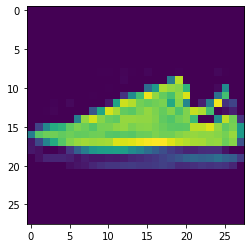

In [15]:
plt.figure()
plt.imshow(train[6])


Step 5: Data Preprocessing

Each pixel of an image is represented by a grayscale number (0-255) where 0 is black and 255 is white. So to constraint all the values between 0 and 1 we divide the entire array by 255

In [16]:
train = train/255.0
test = test/255.0

Step 6: Building the Model Using Keras

In [19]:
model  = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(128,activation='relu'),
                           keras.layers.Dense(10,activation='softmax')
])

1. Layer 1: This is our input layer which is flatten and reshaped into a 28x28 array (784 neurons)
2. Layer 2: This is our only Hidden Layer which is dense(meaning connected to every neuron of the previous layer. There are 128 neurons in this layer and the activation function is rectify linear unit.
3. Layer 3: This is our Output layer which is also dense and is made of 10 neurons representing 10 classes that we have taken in this dataset. Activation function is softmax which returns the probability distribution of the output.

Step 7: Compiling this model 

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Step 8: Training the data using fit

In [21]:
model.fit(train,trainlabels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4960 - accuracy: 0.8271
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3770 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3403 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3155 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2978 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2833 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2699 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2595 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2496 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

Step 9: Finding the Accuracy

In [22]:
testl,testac = model.evaluate(test,testlabels,verbose=1)#verbose means
print(testac)

313/313 [==============================] - 4s 11ms/step - loss: 0.3278 - accuracy: 0.8863
0.8863000273704529


So now we see that the accuracy changes from 0.9093 to 0.8863 this is because the machine has seen the data many times(epoch) So it tends to remember the data. and when given new data it tends to get confused. This is called Overfitting

Step 10: Predicting 

Shirt


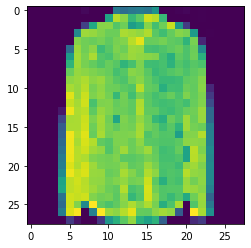

In [26]:
pred = model.predict(test)
#image we want to find
imageno = 44
#every image has a 10 class probability distribution and we select the max using numpy
classno = np.argmax(pred[imageno])
print(class_names[classno])
plt.figure()
plt.imshow(test[imageno])